# Post Meeting Plots
---

In [1]:
import warnings
warnings.simplefilter("ignore")

import sys
sys.path.append("../")

In [2]:
import plot
import pandas as pd
import numpy as np

Loading sub
Loading bus2sub
Loading bus
Loading genbus
Loading branches
Loading resources
Loading net_generation
Done loading
Loading sub
Loading bus2sub
Loading bus
Loading genbus
Loading branches
Loading resources
Loading net_generation
Done loading


In [3]:
PG = pd.read_pickle('U:\PGData\PG.pkl')

## 1. Solar Power Generated in California

The plots below are normalized such that it is 1 when the solar power generated (in MWh) is equal to the capacity of the solar plants (in MW) times the number of hours considered.

### A. One set of plants

Lat        |  Lon  
---        |  ---
36.6175    |  -120.290833
40.428329  |  -122.279248
35.0308    |  -117.3563
35.011111  |  -117.323611
32.7144    |  -115.5356
35.793056  |  -115.35028
38.9032    |  -121.3097      
32.7757    |  -115.2637
34.802222  |  -118.396667
35.026667  |  -118.185556
33.823056  |  -115.393889
34.689167  |  -118.324722
34.848611  |  -118.352778
33.665     |  -114.998055
34.802222  |  -118.396667

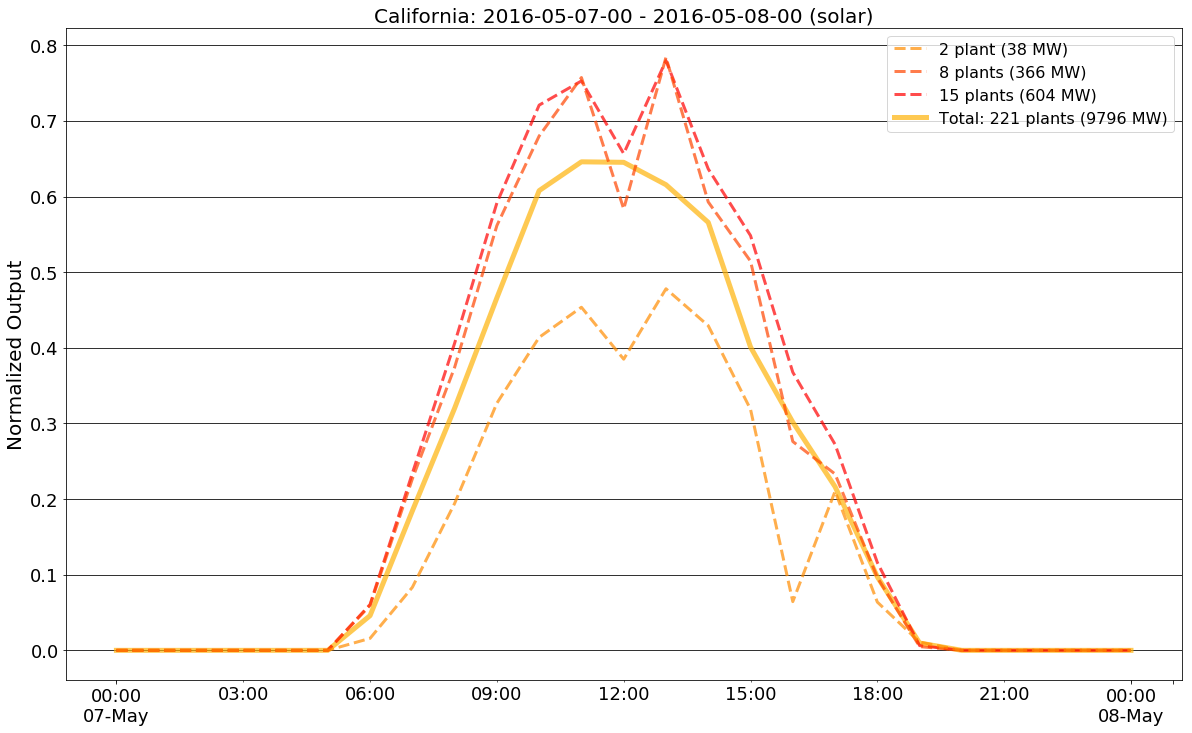

In [4]:
_ = plot.ts_renewable_onezone(PG, 'solar', 'California', from_index='2016-05-07-00', to_index='2016-05-08-00', freq='H', LT=True, seed=0)

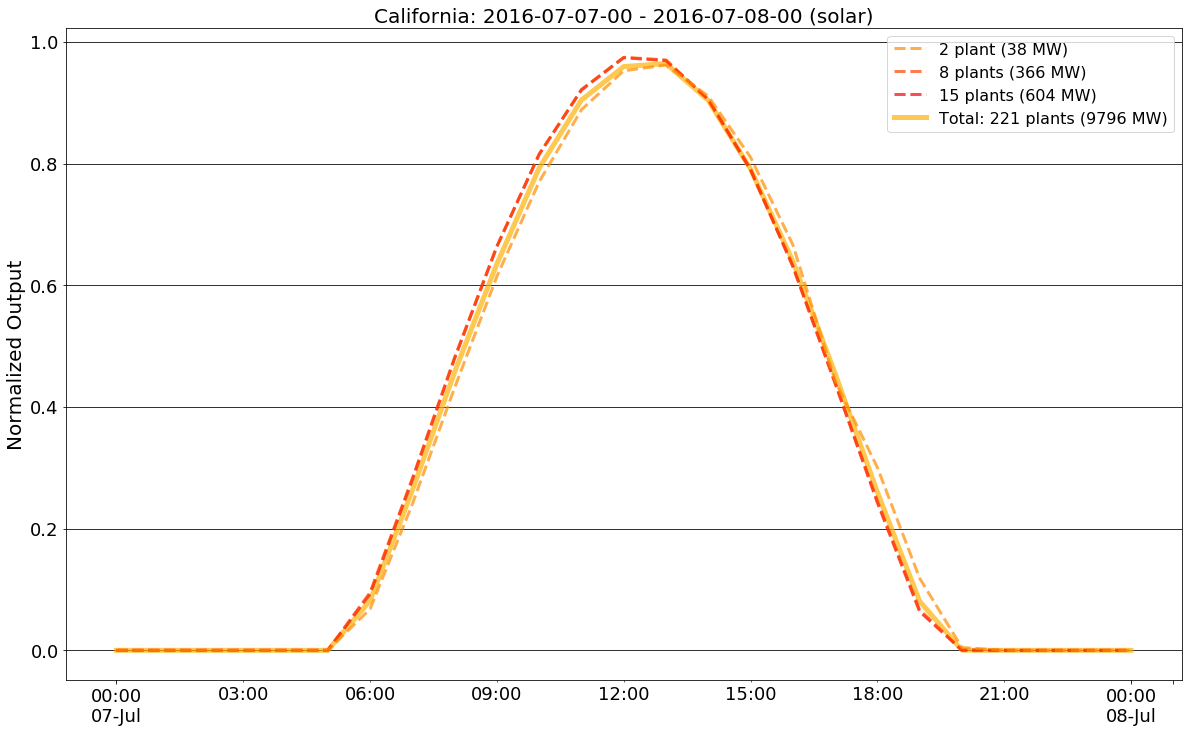

In [5]:
_ = plot.ts_renewable_onezone(PG, 'solar', 'California', from_index='2016-07-07-00', to_index='2016-07-08-00', freq='H', LT=True, seed=0)

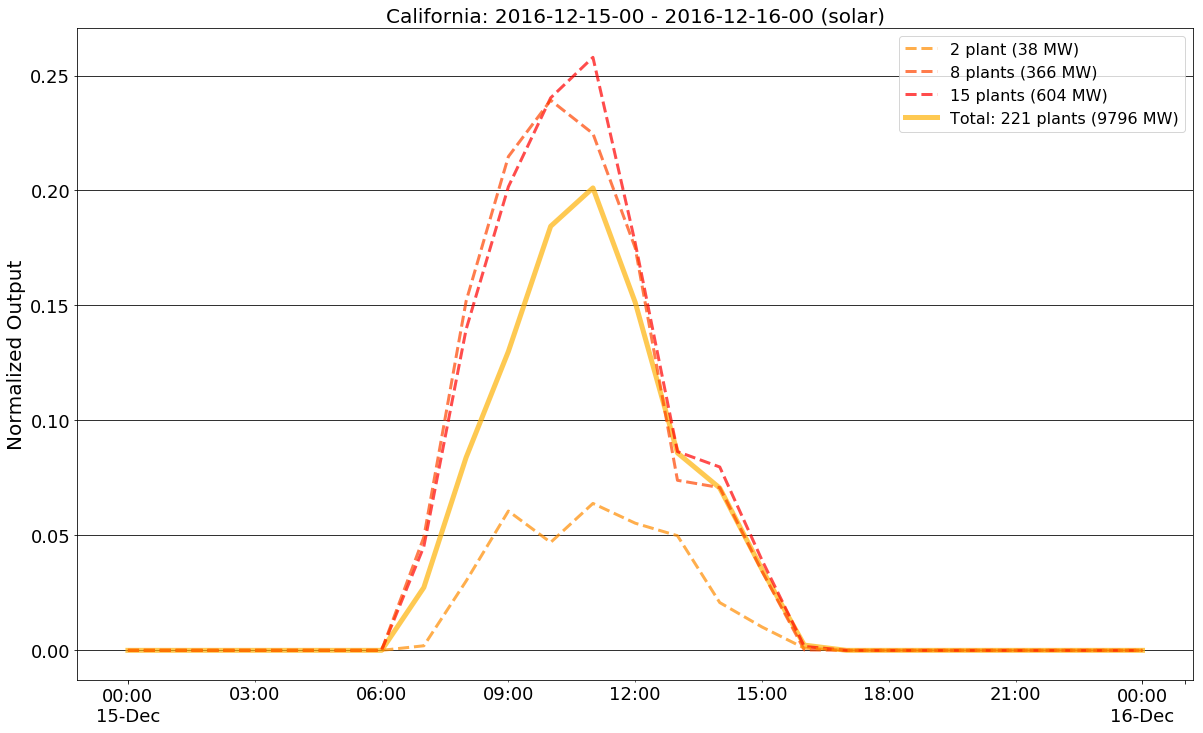

In [6]:
_ = plot.ts_renewable_onezone(PG, 'solar', 'California', from_index='2016-12-15-00', to_index='2016-12-16-00', freq='H', LT=True, seed=0)

### B. Other set of plants

Lat       | Lon
---       | ---
33.665    | -114.998055
38.8348   | -122.7677
38.8348   | -122.7677
35.405556 | -120.068611
33.77697  | -118.22821
33.158153 | -115.638656
32.7757   | -115.2637
36.6175   | -120.290833
35.011111 | -117.323611
36.6175   | -120.290833
33.823056 | -115.393889
35.323739 | -119.91663
32.686944 | -115.647778
36.6175   | -120.290833
35.020981 | -117.566079

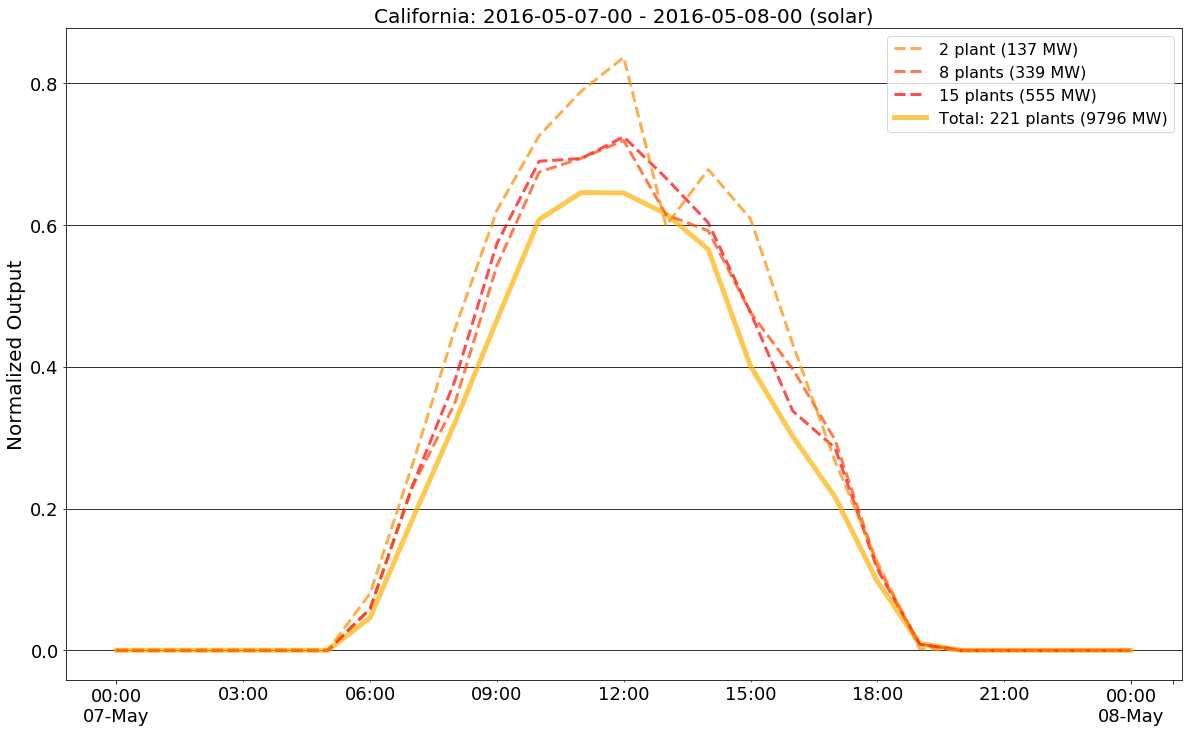

In [7]:
_ = plot.ts_renewable_onezone(PG, 'solar', 'California', from_index='2016-05-07-00', to_index='2016-05-08-00', freq='H', LT=True, seed=10)

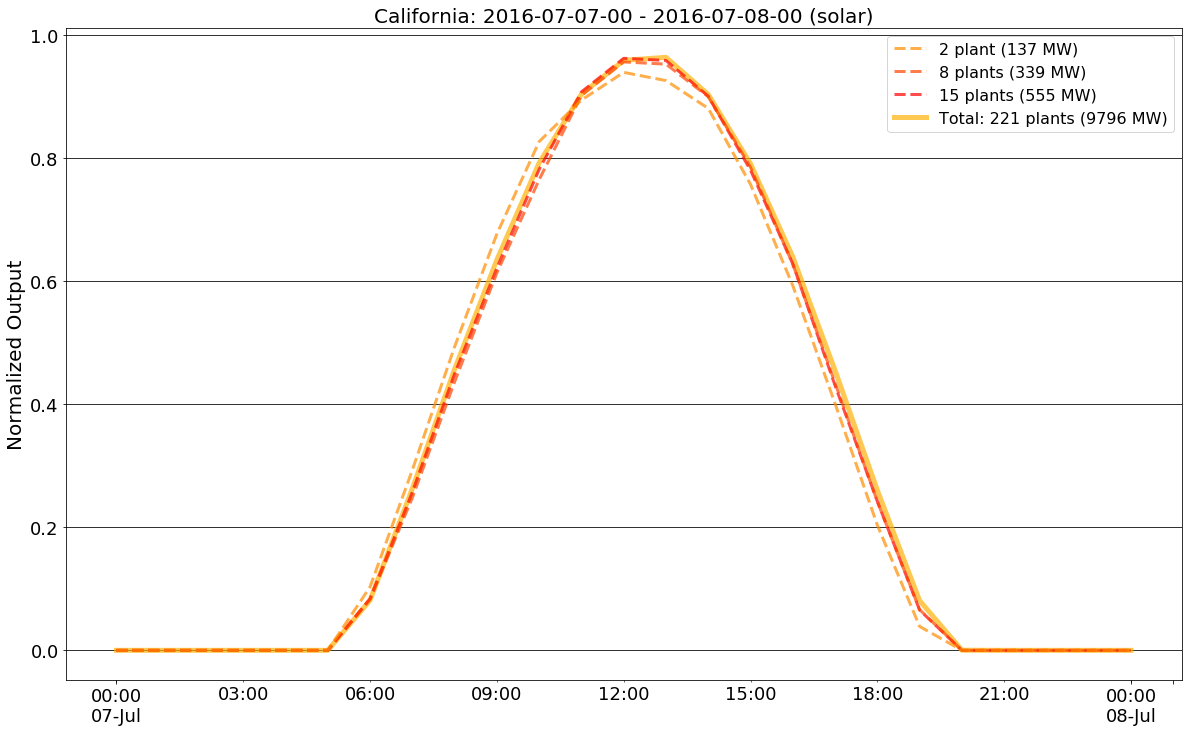

In [8]:
_ = plot.ts_renewable_onezone(PG, 'solar', 'California', from_index='2016-07-07-00', to_index='2016-07-08-00', freq='H', LT=True, seed=10)

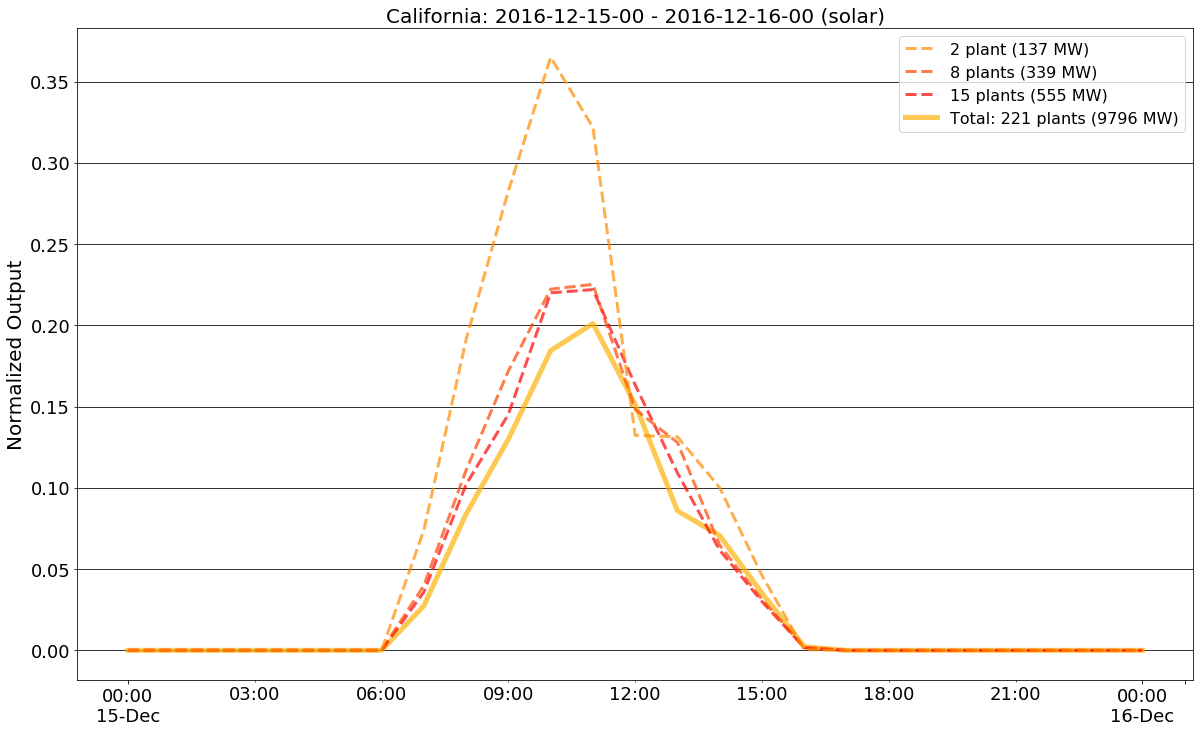

In [9]:
_ = plot.ts_renewable_onezone(PG, 'solar', 'California', from_index='2016-12-15-00', to_index='2016-12-16-00', freq='H', LT=True, seed=10)

## 2. Wind Power Generated in California

The plots below are normalized such that it is 1 when the wind power generated (in MWh) is equal to the capacity of the wind farms (in MW) times the number of hours considered.

### A. One set of plants

Lat       | Lon
---       | ---
35.026683 | -118.234811
33.9211   | -116.5642
35.05     | -118.2572
37.790833 | -121.718055
34.9349   | -118.4612
33.9211   | -116.5642
35.1011   | -118.33721
33.934    | -116.578
37.790833 | -121.718055 
33.9447   | -116.6222
35.008333 | -118.241389
38.12     | -121.85
35.248006 | -118.175356
35.1011   | -118.3372
35.05     | -118.2572

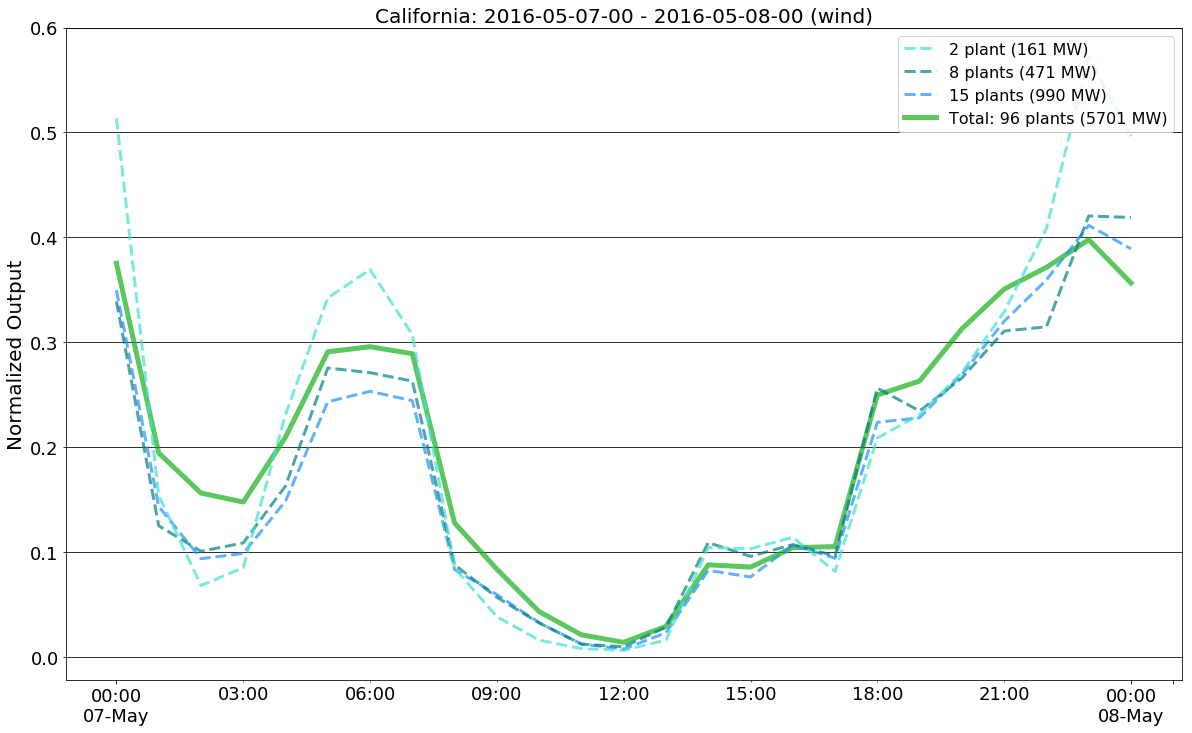

In [10]:
_ = plot.ts_renewable_onezone(PG, 'wind', 'California', from_index='2016-05-07-00', to_index='2016-05-08-00', freq='H', LT=True, seed=0)

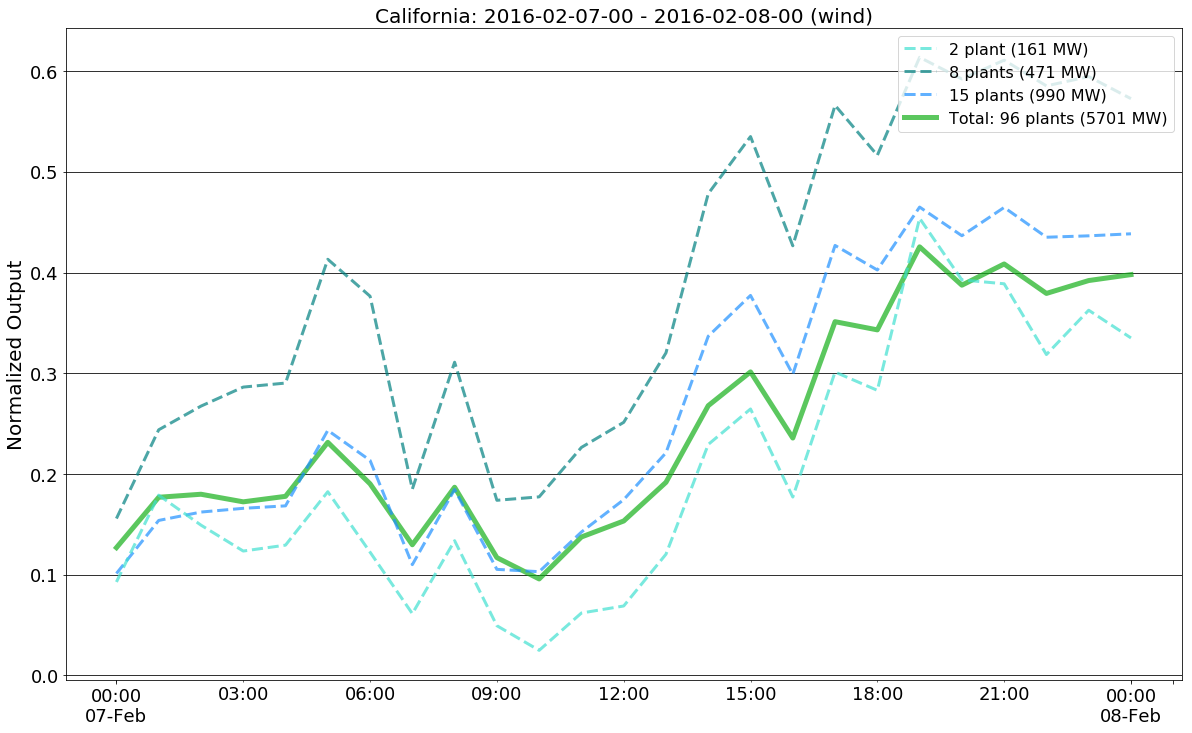

In [11]:
_ = plot.ts_renewable_onezone(PG, 'wind', 'California', from_index='2016-02-07-00', to_index='2016-02-08-00', freq='H', LT=True, seed=0)

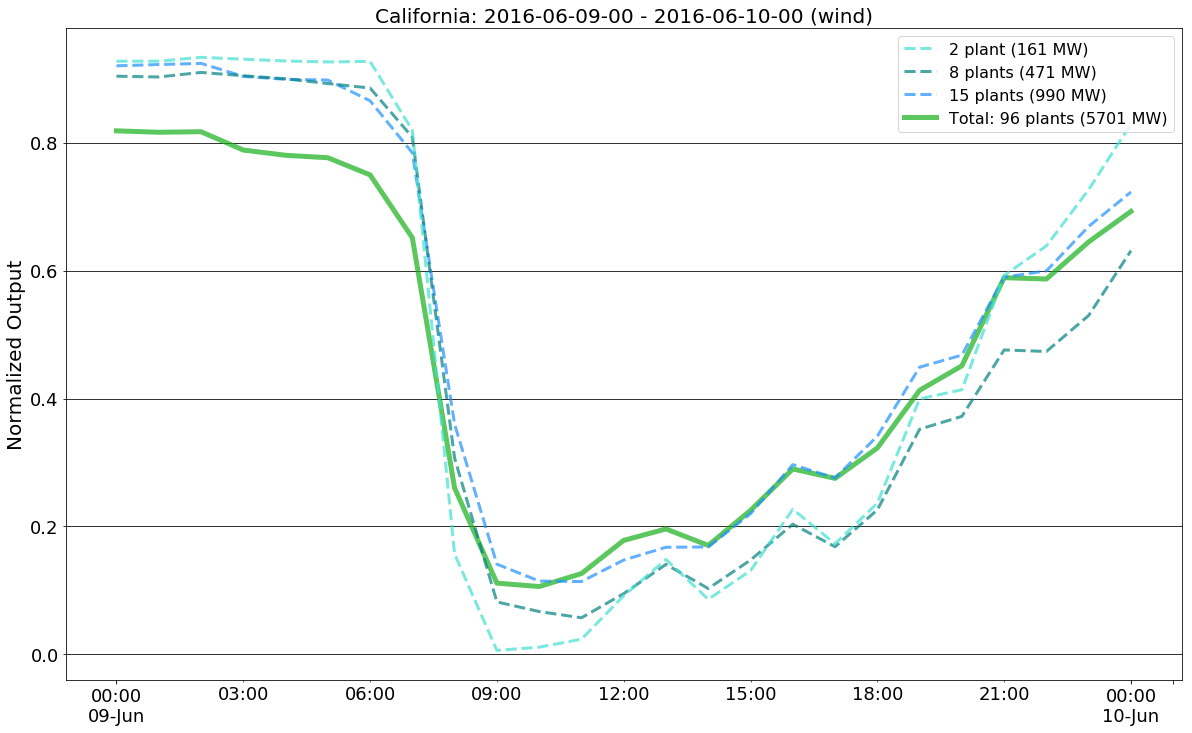

In [12]:
_ = plot.ts_renewable_onezone(PG, 'wind', 'California', from_index='2016-06-09-00', to_index='2016-06-10-00', freq='H', LT=True, seed=0)

## 3. Correlation of Solar Power Generated across States

### A. Year

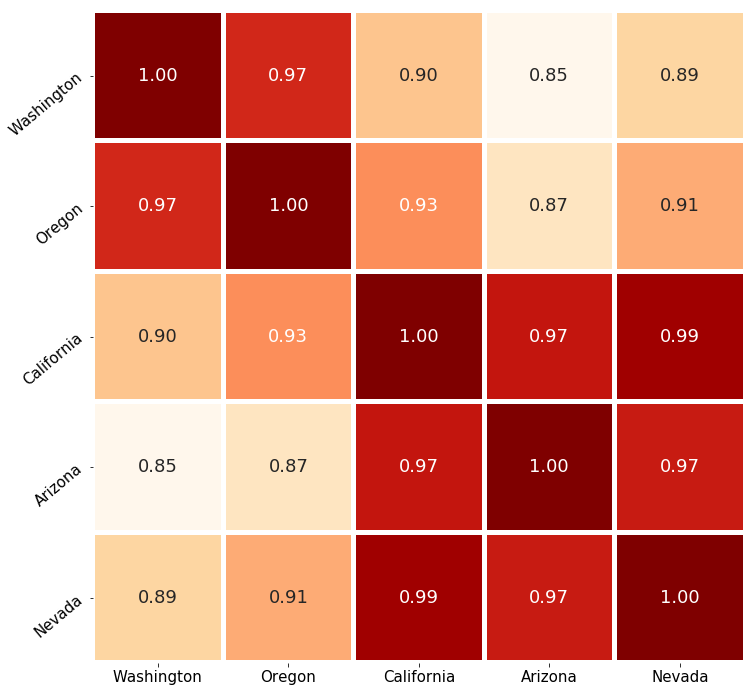

In [13]:
PG_zone_solar = plot.corr_renewable(PG, 'solar', ['Washington','Oregon','California','Arizona','Nevada'])

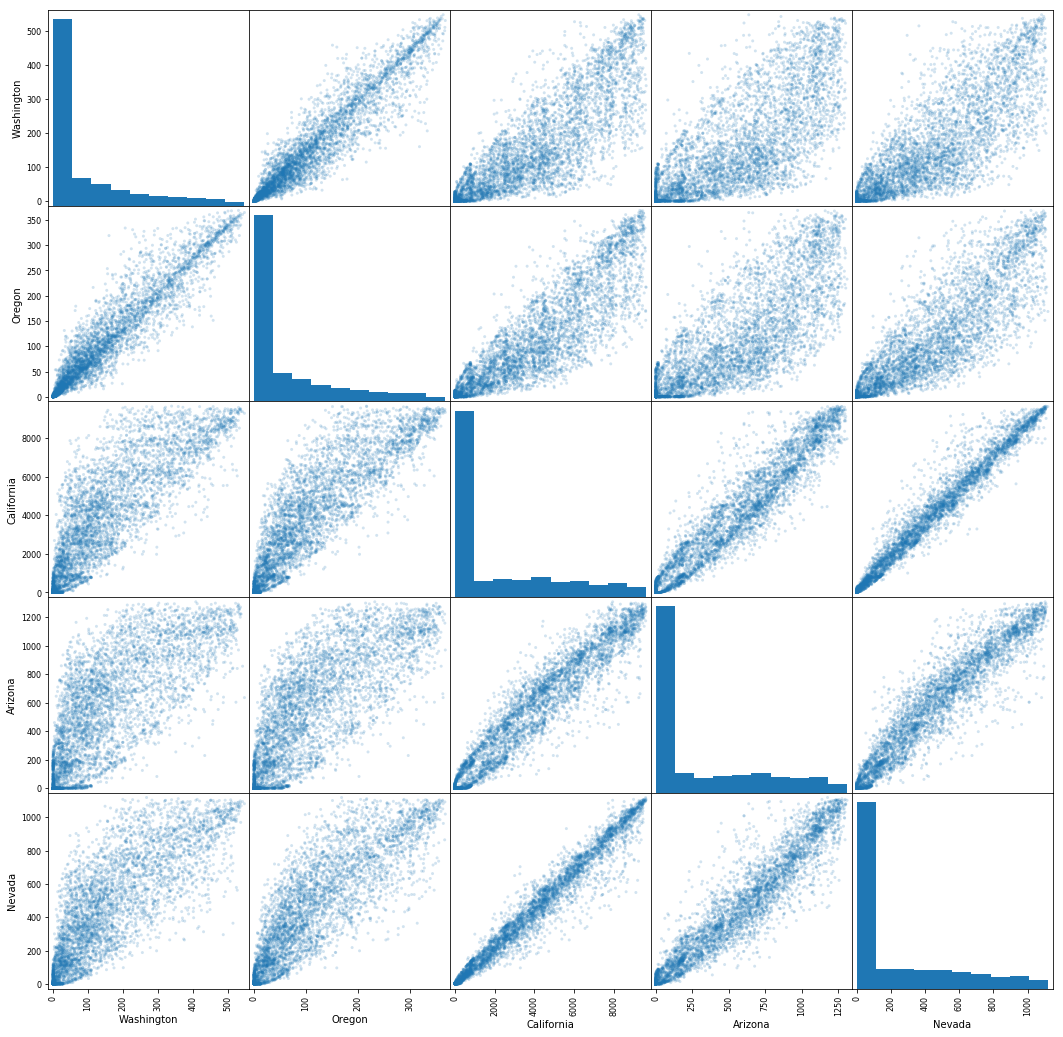

In [14]:
corr = pd.plotting.scatter_matrix(PG_zone_solar, alpha=0.2, figsize=(18,18), diagonal='hist')

In [15]:
PG_zone_solar.corr()

Washington    Oregon  California   Arizona    Nevada
Washington    1.000000  0.965907    0.899538  0.850804  0.886569
Oregon        0.965907  1.000000    0.925330  0.872510  0.913486
California    0.899538  0.925330    1.000000  0.973098  0.988207
Arizona       0.850804  0.872510    0.973098  1.000000  0.970440
Nevada        0.886569  0.913486    0.988207  0.970440  1.000000

### B. Day

In [16]:
import matplotlib.pyplot as plt
plt.ioff()

from datetime import datetime, timedelta

start = datetime.strptime('2016-01-01', '%Y-%m-%d')
end = datetime.strptime('2016-12-31', '%Y-%m-%d')
step = timedelta(days=1)

In [17]:
corr = []
while start <= end:
    PG_tmp = PG[start:start+step]
    corr.append(plot.get_corr_renewable(PG_tmp, 'solar', ['Washington','Oregon','California','Arizona','Nevada']).corr())
    start += step

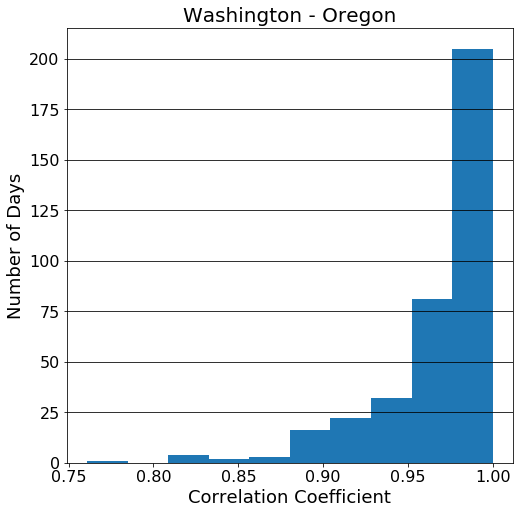

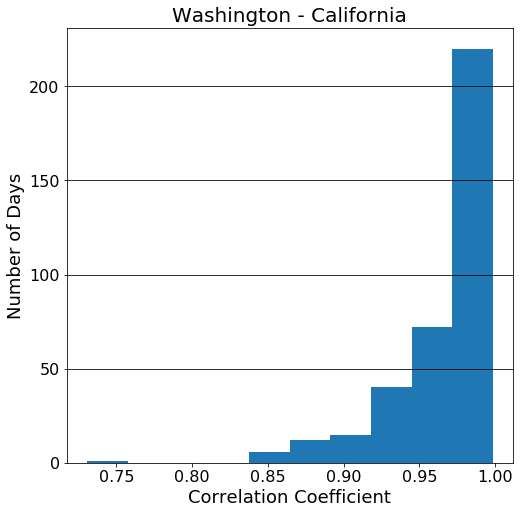

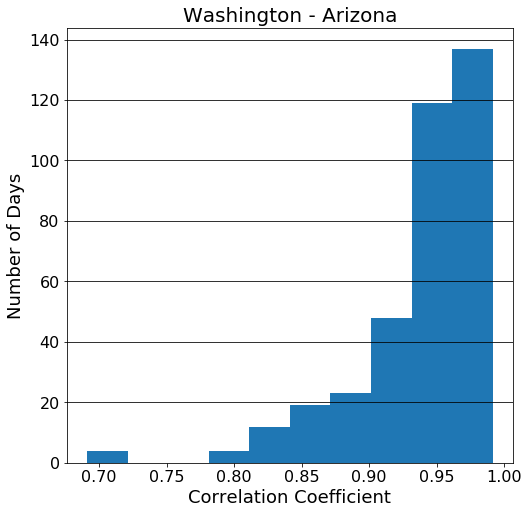

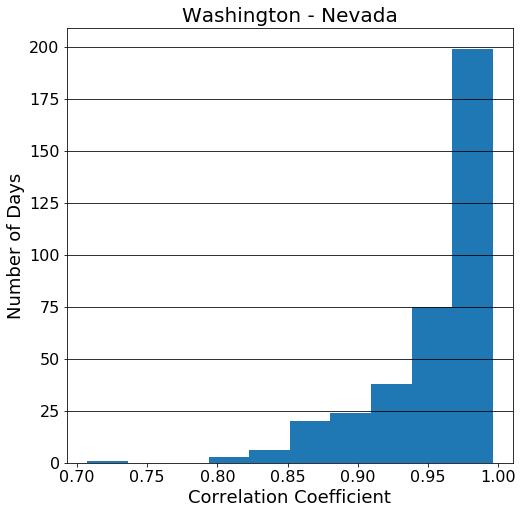

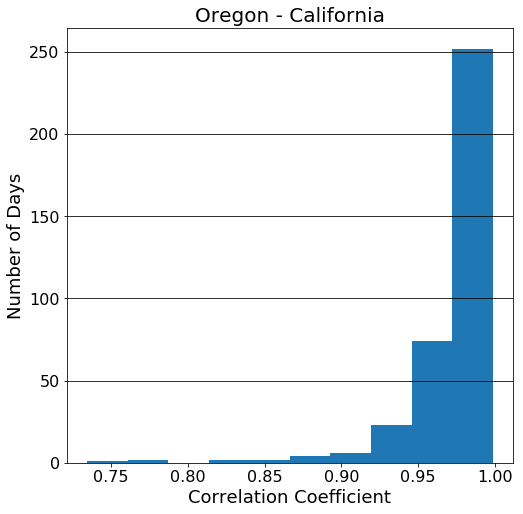

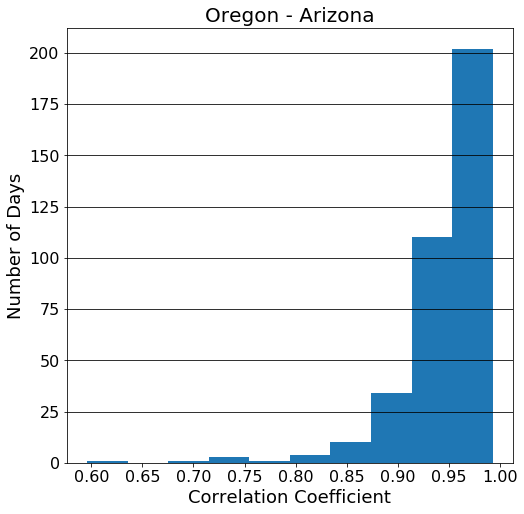

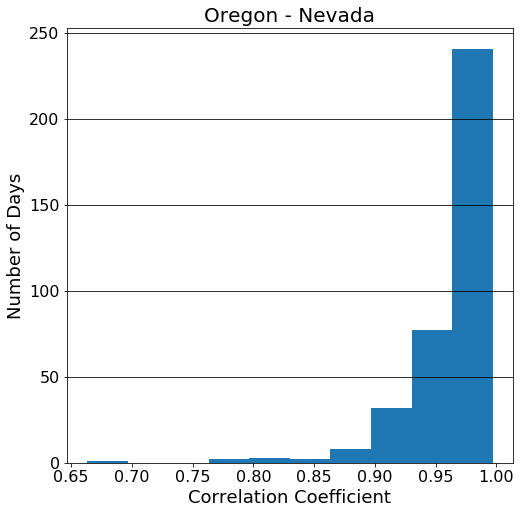

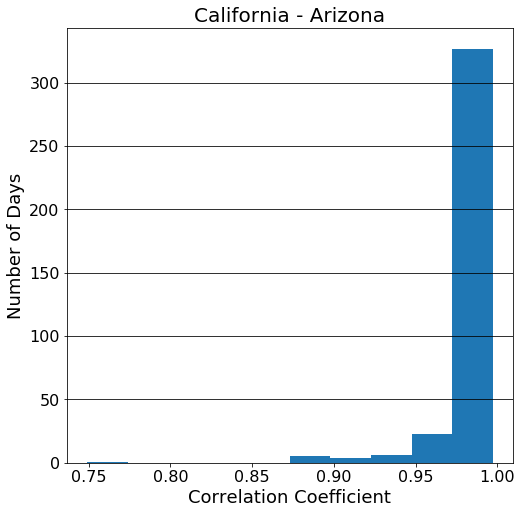

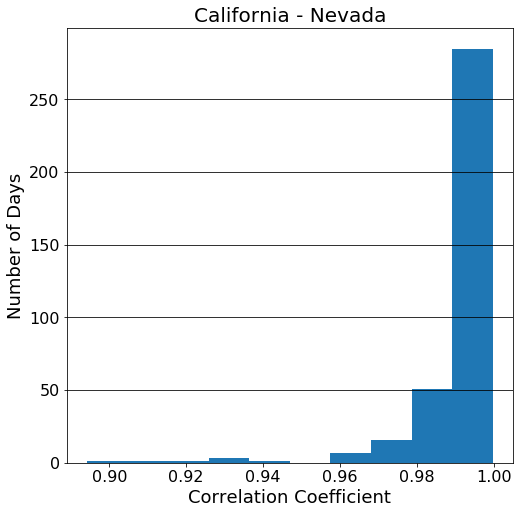

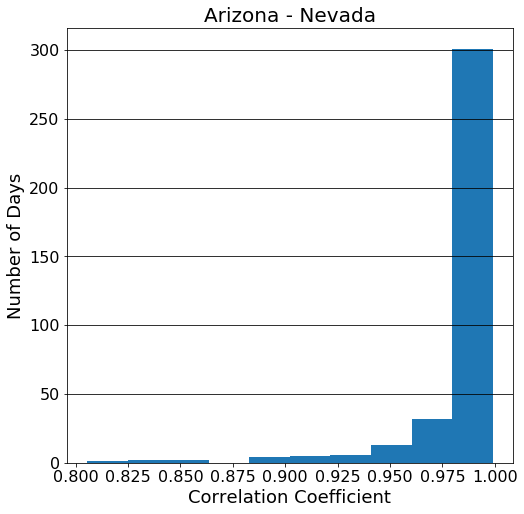

In [18]:
import itertools
pairs = list(itertools.combinations(PG_zone_solar.columns.tolist(), 2))
for p in pairs:
    fig = plt.figure(figsize=(8, 8))
    plt.hist([corr[i].loc[p[0]][p[1]] for i in range(len(corr))], 10)
    ax = fig.gca()
    ax.set_facecolor('white')
    ax.grid(color='black', axis='y')
    ax.tick_params(labelsize=16)
    ax.set_xlabel('Correlation Coefficient', fontsize=18)
    ax.set_ylabel('Number of Days', fontsize=18)
    plt.title(" - ".join(p), fontsize=20)
plt.show()

## 2. Correlation of Wind Power Generated across States

### A. Year

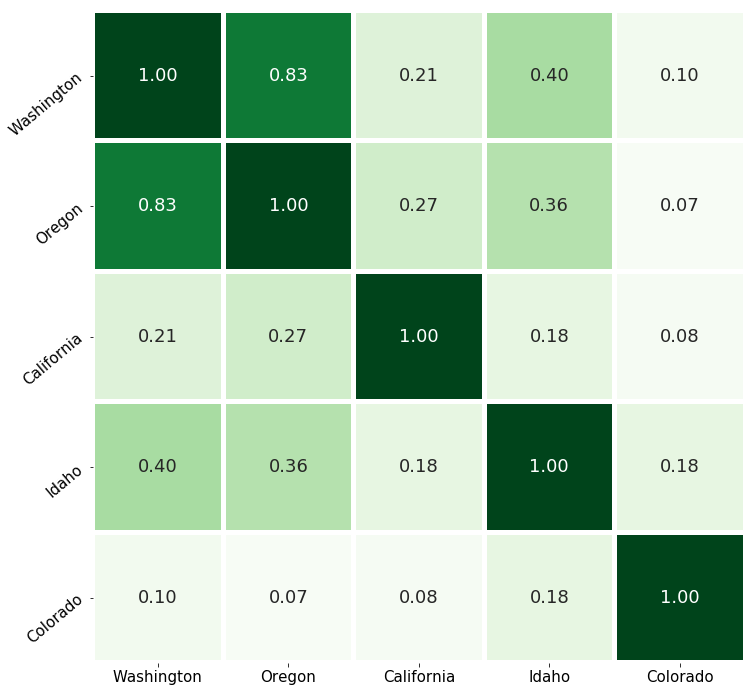

In [19]:
PG_zone_wind = plot.corr_renewable(PG, 'wind', ['Washington','Oregon','California','Idaho','Colorado'])

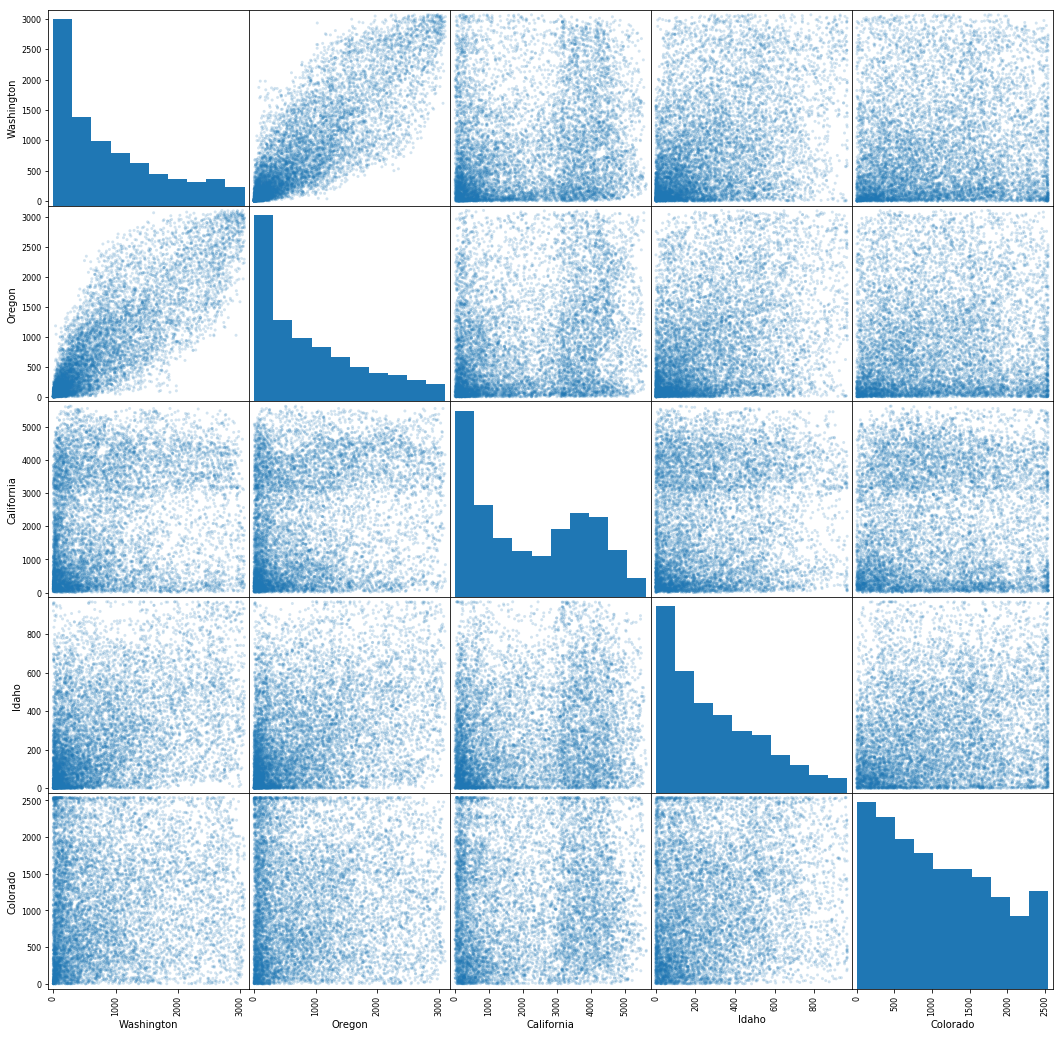

In [20]:
corr = pd.plotting.scatter_matrix(PG_zone_wind, alpha=0.2, figsize=(18,18), diagonal='hist')

In [21]:
PG_zone_wind.corr()

Washington    Oregon  California     Idaho  Colorado
Washington    1.000000  0.833675    0.213932  0.401380  0.104864
Oregon        0.833675  1.000000    0.269699  0.361422  0.071854
California    0.213932  0.269699    1.000000  0.179846  0.082959
Idaho         0.401380  0.361422    0.179846  1.000000  0.180177
Colorado      0.104864  0.071854    0.082959  0.180177  1.000000

### B. Day

In [22]:
import matplotlib.pyplot as plt
plt.ioff()

from datetime import datetime, timedelta

start = datetime.strptime('2016-01-01', '%Y-%m-%d')
end = datetime.strptime('2016-12-31', '%Y-%m-%d')
step = timedelta(days=1)

In [23]:
corr = []
while start <= end:
    PG_tmp = PG[start:start+step]
    corr.append(plot.get_corr_renewable(PG_tmp, 'wind',['Washington','Oregon','California','Idaho','Colorado']).corr())
    start += step

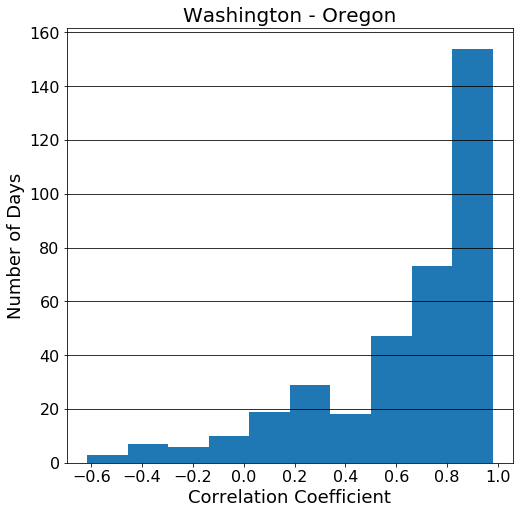

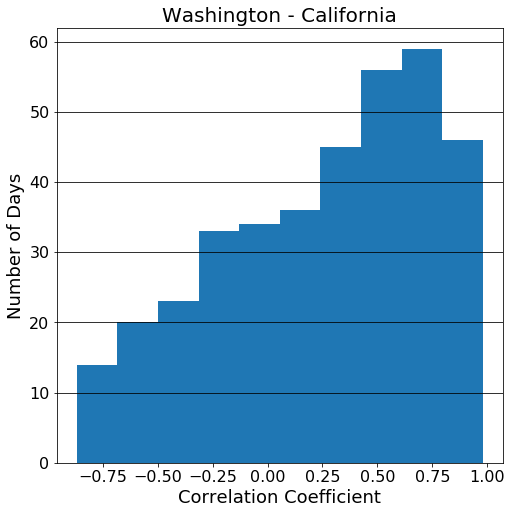

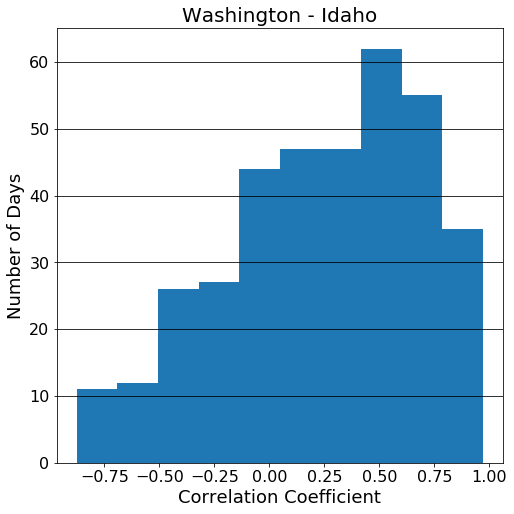

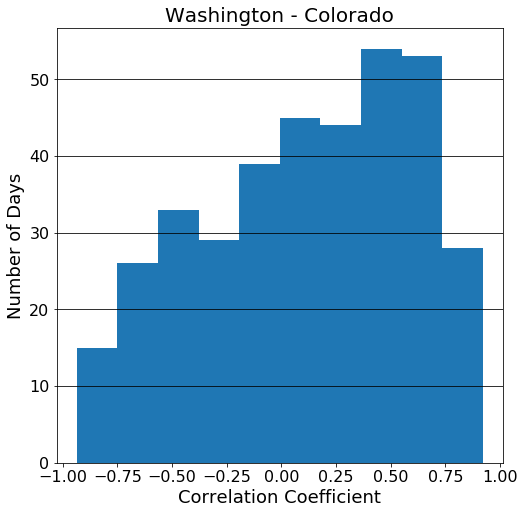

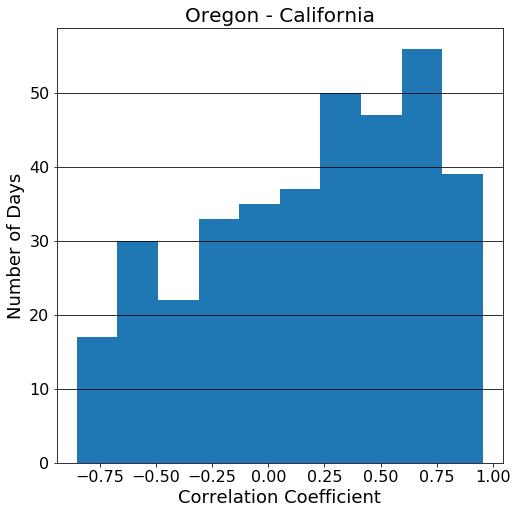

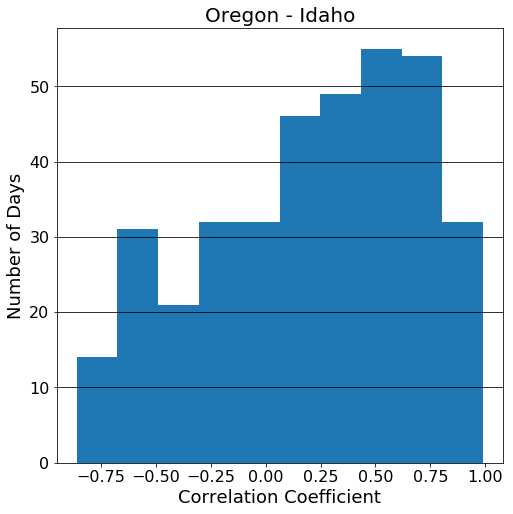

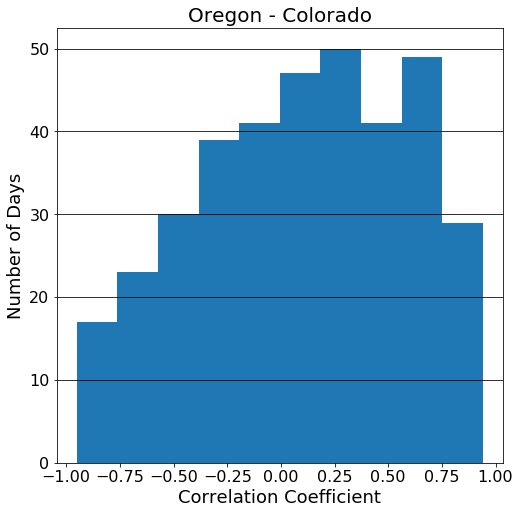

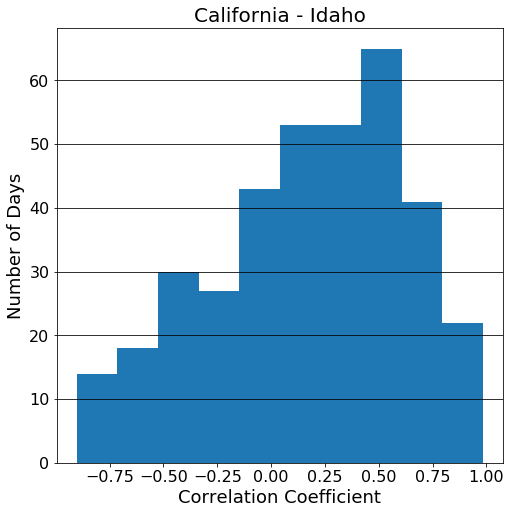

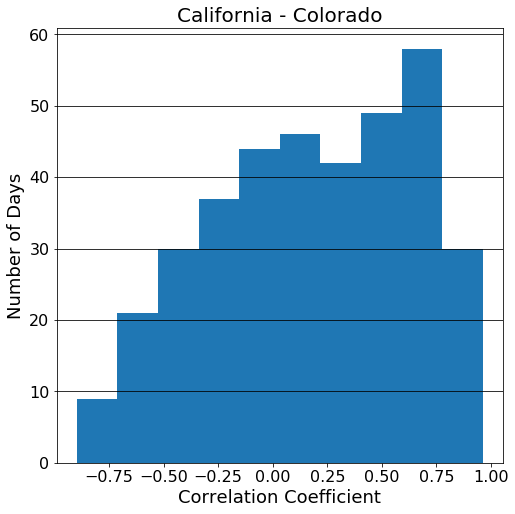

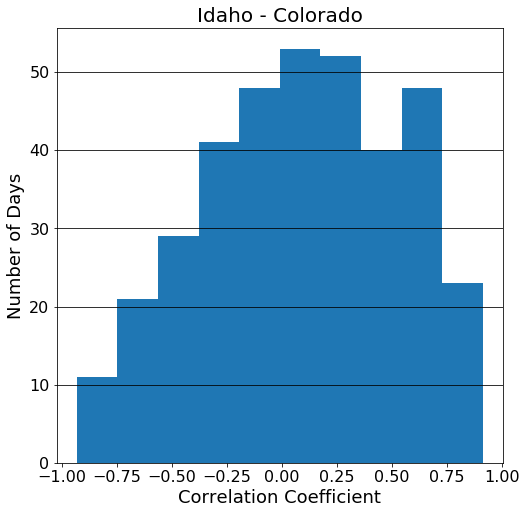

In [24]:
import itertools
pairs = list(itertools.combinations(PG_zone_wind.columns.tolist(), 2))
for p in pairs:
    fig = plt.figure(figsize=(8, 8))
    plt.hist([corr[i].loc[p[0]][p[1]] for i in range(len(corr))], 10)
    ax = fig.gca()
    ax.set_facecolor('white')
    ax.grid(color='black', axis='y')
    ax.tick_params(labelsize=16)
    ax.set_xlabel('Correlation Coefficient', fontsize=18)
    ax.set_ylabel('Number of Days', fontsize=18)
    plt.title(" - ".join(p), fontsize=20)
plt.show()